# Computational Skills for Materials Science

## Session 2 - Data Analysis: coursework

### Name:  Siddharth Mahala

#### Measuring the distance between atoms using time of flight neutron diffraction

For this coursework we will look at analysing some data from a time-of-flight neutron diffraction experiment on an aerospace aluminium alloy sample.

Time-of-flight neutron diffraction uses neutrons to measure the distance between atoms. In this technique, a white neutron beam is shone on the sample and large detectors are used to collect the neutrons that are scattered off. The beam is "white" because it contains neutrons with many different velocities and hence different wavelengths. However not all wavelengths are scattered equally: those with wavelengths closer to regular spacing of the atoms in the crystal interfere constructively and scatter much more strongly. This means we can measure the distance between the atoms in the sample by counting how many neutrons are scattered of which wavelength. This is very useful in materials science: we can use this distance to measure the stress in a material, to measure its thermal expansion, to determine its structure and much more.

In [time-of-flight diffraction](http://nmi3.eu/neutron-research/techniques-for-/dynamics/time-of-flight-spectroscopy.html), we use the fact that neutrons with different wavelengths have different velocities, as described by the de Broglie equation:

$$p=mv=\dfrac{h}{\lambda}$$

where $p$ is momentum, $m$ is the mass of a neutron, $v$ its velocity and $\lambda$ its wavelength.

These velocities are not very high. For example, a neutron with a wavelength of $1 \, \mathrm{nm}$ has a velocity of:

$$v=\dfrac{h}{\lambda m}=\dfrac{6.626 \times 10^{-34}}{1.0\times 10^{-9}\times 1.675 \times 10^{-27}} = 395.6 \quad \mathrm{m\,s^{-1}} $$

which just over the speed of sound. In a time-of-flight experiment we send out neutrons in pulses and then count how many scattered neutrons arrive at different times. Of course since time can be converted into wavelength, it can be converted into the spacing between the atoms diffracting, also called the d-spacing.

Neutrons are difficult to detect, so neutron detectors can be very big:

![ToF detectors at FMRII in Germany](https://nmi3.eu/toftof-rex_img_type=content_noresize&rex_img_file=toftof.jpg.jpg)

Neutron counts are statistical measurements, which need to be analysed to give the required interatomic distances. In this coursework you'll be working with data from [ISIS](http://www.isis.stfc.ac.uk/), a neutron source near Harwell in the UK. Each file contains the number of neutrons (intensity) detected that correspond to a given atomic spacing (d-spacing). You will use the data to determine the d-spacing of the material.


###  Importing modules

The modules that you will need for this coursework are: 

`numpy`, `matplotlib.pyplot` and `curve_fit` from `scipy.optimize`

#### These modules can be imported by running the cell below:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab

### <span style="color: red"> Question 1: </span>  Reading and plotting data:

You can find the diffraction data for this exercise in the `/coursework_data/` folder. There are 4 files with each one increasing the neutron counting times from the previous one. 

We will start our analysis with the first file. Open `spectrum_1.txt` using a text editor and examine the data. The first column is the d-spacing between adjacent lattice planes in Angstrom and the second column is the intensity in units of neutron counts.


#### 1.1 : Read in the two columns of data from `spectrum_1.txt` into arrays called `d_spacing` and `intensity` using the function `np.loadtxt()` in the cell below:
(5 marks)

 *Hints:*
 * *Remember how we read in the data for size of pores in a metal foam in the class notebook.*
 * *You will need to skip the first row of the data, which contains the header.*
 * *Use `print()` to check you have read the right data.*

In [11]:

import numpy as np

d_spacing = np.loadtxt('D:/Manchester Semester 7/Career/Notion/Computing/2/spectrum_1.txt', skiprows=1, usecols=(0))
print(d_spacing)

intensity = np.loadtxt('D:/Manchester Semester 7/Career/Notion/Computing/2/spectrum_1.txt', skiprows=1, usecols=(1))
print(intensity)


[0.625521 0.625646 0.625771 ... 2.4361   2.43659  2.4368  ]
[0. 0. 0. ... 0. 0. 0.]


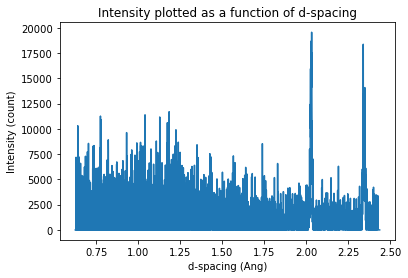

In [12]:
%matplotlib inline

plt.plot(d_spacing, intensity)
plt.xlabel('d-spacing (Ang)')
plt.ylabel('Intensity (count)')
plt.title('Intensity plotted as a function of d-spacing')
plt.show()

### <span style="color: red"> Question 2: </span>  Fitting a model to the data:

Next, we want to concentrate on one of the peaks which is at approximately 2 Angstroms d-spacing and fit a curve to that peak. 

We have saved the data in the interval where the peak lies [1.96, 2.1] in a new file called `spectrum_1_2Ang.txt`. Run the cell below to load the data into arrays `d_spacing_2 ` and `intensity_2`:

In [14]:
d_spacing_2 = np.loadtxt('D:/Manchester Semester 7/Career/Notion/Computing/2/spectrum_1_2Ang.txt', skiprows=1,usecols=(0,))
intensity_2 = np.loadtxt('D:/Manchester Semester 7/Career/Notion/Computing/2/spectrum_1_2Ang.txt', skiprows=1,usecols=(1,))

#### 2.1: Repeat 1.2 for the truncated arrays `intensity_2` and `d_spacing_2` to plot the peak at 2 Ang.

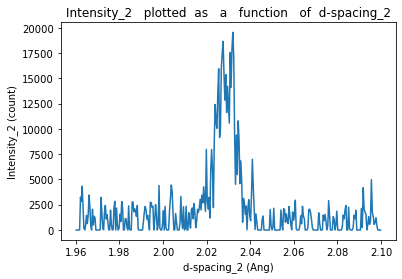

In [15]:
%matplotlib inline
plt.plot(d_spacing_2, intensity_2)
plt.xlabel('d-spacing_2 (Ang)')
plt.ylabel('Intensity_2 (count)')
plt.title('Intensity_2   plotted  as   a   function   of  d-spacing_2')
plt.show()

We expect the intensity peak to fit a Gaussian function with the following relationship:

$$f(x) = A \exp\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big), $$

where $A$ is the intensity peak, $x$ is the d-spacing, $\mu$ is the mean d-spacing of the distribution (the central value) and $\sigma$ is the standard deviation. 


#### 2.2: Define a function `gauss` that takes `x`, `A`, `mu` and `sigma` as the input and holds the form of a Gaussian function as the output: 


In [16]:
def gauss(x,A,mu, sigma):
    return A*np.exp((-(x-mu)**2/(2*sigma**2)))


#### 2.3: Use <code>curve_fit</code> to fit the model `gauss` to the data in our arrays `d_spacing_2` and `intensity_2` and assign the  result to variables called `popt` and `pcov`. 

*Hints:*
* *Remember that `curve_fit` returns two numpy arrays, which we call here `popt` and `pcov` (but can be called anything you want).*
* *The first variable `popt` is a numpy array which contains the optimised values of the parameters of the model: A - the peak intensity, `mu` - the mean d-spacing and `sigma` - the standard deviation.* 

In [17]:
def gauss(x,A,mu, sigma):
    return A*np.exp((-(x-mu)**2/(2*sigma**2)))

A= intensity_2
x= d_spacing_2
mu= np.mean(d_spacing_2)
sigma= np.std(d_spacing_2)


popt, pcov = curve_fit(gauss,d_spacing_2,intensity_2)
print(popt)

[1.53685562e+04 2.02881257e+00 5.02562574e-03]


#### 2.4  Plot the original data and the fitted model for the peak at 2 Angstroms to check how good your fit is. 

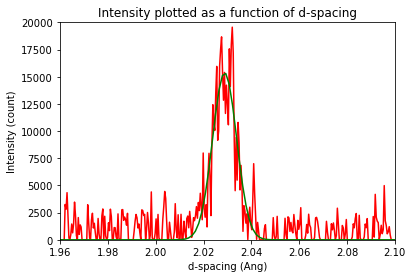

In [18]:
%matplotlib inline
spacing = np.linspace(1.96, 2.10, 100)  # Adjust the range if needed
fit = gauss(spacing, popt[0], popt[1], popt[2])

# Plot the original data and the fitted curve
plt.plot(d_spacing, intensity, 'r')  # Original data in red
plt.plot(spacing, fit, 'g-')         # Fitted model in green

# Set x-axis and y-axis limits to zoom in on the peak region
plt.xlim(1.96, 2.10)  # Zoom in around the peak at 2 Angstroms
plt.ylim(0, 20000)    # Adjust the y-limit to focus on the peak's intensity range

# Add labels and title
plt.xlabel('d-spacing (Ang)')
plt.ylabel('Intensity (count)')
plt.title('Intensity plotted as a function of d-spacing')

# Display the plot
plt.show()

### <span style="color: red"> Question 3: </span>  Statistics:

In a neutron diffraction experiment, the counting time is a parameter which we can increase to get better statistics and improve the accuracy of our results. We have repeated the steps in Question 1 and 2, for three more sets of data with increasing counting times called `spectrum_10.txt`, `spectrum_20.txt` and `spectrum_30.txt`. You can find the results in `diffraction_results.txt`.

*Hint:*
* *`diffraction_results.txt` also contains the results for `spectrum_1.txt` so you can check that your answer to Question 2.6 is correct. Note the answers will vary slightly.*
* *If you are interested in practicing, you can try fitting the data from the extra files yourself.*


#### 3.1: Read in the data from `diffraction_results.txt` into arrays `data_number` and `means`:

In [19]:
import numpy as np

data_number = np.loadtxt('D:/Manchester Semester 7/Career/Notion/Computing/2/diffraction_results.txt', skiprows=2, usecols=(0,))
print(data_number)
means = np.loadtxt('D:/Manchester Semester 7/Career/Notion/Computing/2/diffraction_results.txt', skiprows=2, usecols=(1,))
print(means)

[ 1. 10. 20. 30.]
[2.02883903 2.0290564  2.0291003  2.02911788]


#### 3.2: Plot how the mean value (`means`) varies with increasing the sample number (`data_number`) i.e. with increasing the neutron counting time and comment on the trend that you see:

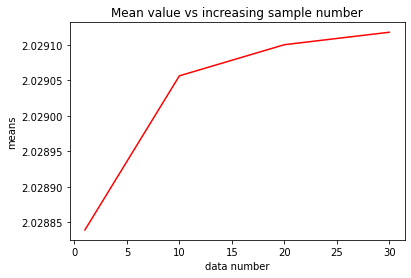

In [20]:
%matplotlib inline
plt.plot(data_number,means, 'r')
plt.xlabel('data number')
plt.ylabel('means')
plt.title('Mean value vs increasing sample number')
plt.show()

The mean value exhibits a general increasing trend with increasing sample number (data number), which reflects the effect of increasing neutron counting time. Initially, there is a steeper rise in the mean value for data numbers 1 to 10, but this increase becomes more gradual for larger data numbers. The change in slope is less dramatic after data number 20, and the data begins to stabilize, indicating that the mean value increases more slowly as the sample size grows.

This gradual change in slope is expected, as with more neutron counting, the rate of change in the mean value slows down due to the small sample size and the effect of discrete data points

#### 3.3: Write the sample number and mean values into a text file called `output.txt`, using justified formatting.

In [21]:
myFile= open('D:/Manchester Semester 7/Career/Notion/Computing/2/output.txt', 'w')

myFile.write('Sample number'.rjust(16) + 'Mean'.rjust(16) +  '\n')
myFile.write('------------'.rjust(16) + '------------'.rjust(16)  + '\n')
myFile.write('1'.rjust(16) + '2.02883902859'.rjust(16)  + '\n')
myFile.write('10'.rjust(16) + '2.02905639519'.rjust(16)  + '\n')
myFile.write('20'.rjust(16) + '2.02910030336'.rjust(16)  + '\n')
myFile.write('30'.rjust(16) + '2.02911787955 '.rjust(16)  + '\n')

myFile.close()

### <span style="color: red">Question 4</span>: Aluminium has a face-centred cubic structure. The peak at 2 angstroms corresponds to a set of planes $(hkl)$ with a characteristic d-spacing. Can you find which set of planes $(hkl)$  this d-spacing corresponds to?

*Hint:*
* *The d-spacing of a set of planes $(hkl)$ in the cubic crystal structure is given by: $d = \sqrt{\frac{a^2}{h^2+k^2+l^2}}$, where $a$ is the lattice parameter. *

$\frac{a^{2}}{d^{2}} = h^{2} + k^{2} + l^{2}$  
(Squaring both sides and rearranging, we get the desired equation.)

In [22]:
a= 4.0459
d= 2.029

print (a**2/d**2)


3.976181448348381


So the value of  $h^{2} + k^{2} + l^{2} = 4$

According to the question the value of h is 2 and 0 for k and l respectively.


Therefore, $2^{2} +0^{2} + 0^{2} = 4$

The value of planes thus obtained are [2 0 0], [0 2 0], [0 0 2], [-2 0 0], [0 -2 0], [0 0 -2] . 